# **BDM Project : ‘Cryptocurrencies and Stocks’**
**TEAM 10**
<br>

Team Members :
* Meghna Ashok
* Zainab Billa
* Yashi Gupta
* Lavanya Ramamurthy
* Swathi Sukumar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Prep and EDA

##  1. Prepare the Data

In [ ]:
#We import modules for data wrangling and analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [ ]:
# packages needed to call Yahoo finance API and load stocks
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 81 kB 8.1 MB/s 
     |████████████████████████████████| 83 kB 1.4 MB/s 
     |████████████████████████████████| 112 kB 42.4 MB/s 
     |████████████████████████████████| 127 kB 48.7 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=452997ee21e7e3f7bb28bd9b20e4598af84d7cef0e35db84f03a1133956d7e15
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=4f018ce93f256138e0a076330c8d0846a24556d7a35eb609300aaa641d67691a
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=8d770228c4119e5fafb0df8c1b35dc7a4eb327098f089f1bb0b19642dae97d2f
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

**Stocks**

Market Cap requirement : <= $2 Billion:

<br>

The Stocks we have chosen as per our requirement are : 

<br>

**AITX** :Artificial Intelligence Technology Solutions Inc.  <br>
          Market Cap at time of analysis:	66.112M<br>
          https://finance.yahoo.com/quote/AITX?p=AITX

<BR>

**NVTA** : Invitae Corporation<br>
       Market Cap at time of analysis:	1.578B<br>
       https://finance.yahoo.com/quote/NVTA?p=NVTA<br><br>

**TVTY** : Tivity Health, Inc.<br>
       Market Cap at time of analysis:	1.612B<br>
       https://finance.yahoo.com/quote/TVTY?p=TVTY<br><br>

**ERBB** : American Green, Inc.<br>
         Market Cap at time of analysis:	110.031M<br>
         https://finance.yahoo.com/quote/ERBB?p=ERBB


**CryptoCurrencies**

Market Cap requirement : $20Billion to 40Billion :
<BR>
<BR>
The Cryptocurrencies we have chosen as per our requirement are :

**LUNA** : Terra<BR>
       Market Cap $30,674,471,693<BR>
       https://coinmarketcap.com/currencies/terra-luna/
<BR><BR>

**SOL**: Solana<BR>
Market Cap<BR>
$33,762,249,079<BR>
https://coinmarketcap.com/currencies/solana/
<BR><BR>

**UST**: TerraUSD<BR>
      Market Cap $16,746,294,872<BR>
      https://coinmarketcap.com/currencies/terrausd/
<BR><BR>


**LTC** : Litecoin<BR>
Market Cap<BR>
$7,334,897,793 <BR>
https://coinmarketcap.com/currencies/litecoin/<BR>

Note that UST and LCT Cryptocurrecies were chosen out of our required Market Cap bracket, since we had unsatisfactory data for the rest of the Cryptocurrencies fitting the Market cap. Details explained below.

Upon filtering for cryptocurrencies in the 20Billion to 40Billion range, we are left with 5 Cryptocurrecies, as shown in the image.



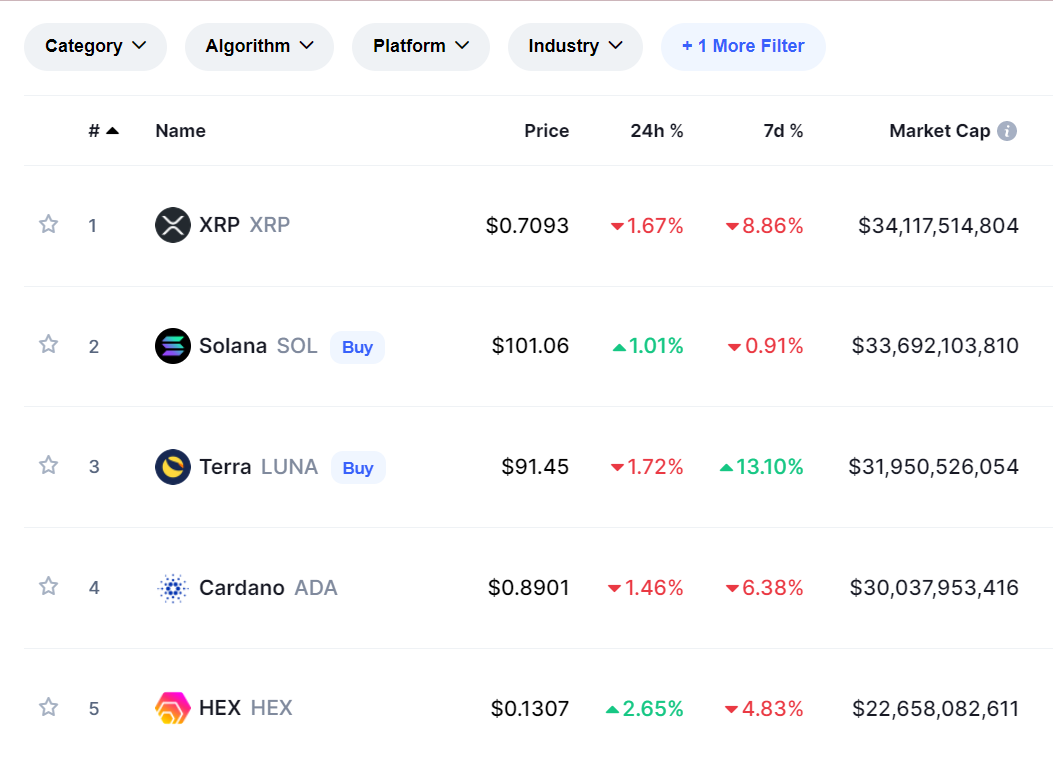

For the Cryptocurrencies XRP, ADA and HEX we face the following issues :

In [ ]:
# 1 : XRP
#from yahoo_fin.stock_info import get_data
#xrp= get_data("XRP", start_date="01/01/2016", end_date="12/31/2020", index_as_date = True, interval="1d")

#We get a timestamp error while loading data since the API does not fetch 1 day interval data for XRP. Hence, we excluded XRP from our analysis.

In [ ]:
# 2 : Cardano ADA
from yahoo_fin.stock_info import get_data
ada= get_data("ADA", start_date="01/01/2016", end_date="12/31/2020", index_as_date = True, interval="1d")
print("The returned ADA Data frame has ",ada.shape[0],"rows and ",ada.shape[1]," columns.")
#There are 523 rows but there is no variation in the data. All 523 rows have the same value of 2.13.

The returned ADA Data frame has  1258 rows and  7  columns.


In [ ]:
#Out of the 1258 rows, 735 are missing values which leaves us 523 non-null rows.
ada.isnull().sum()

open        735
high        735
low         735
close       735
adjclose    735
volume      735
ticker        0
dtype: int64

In [ ]:
#On further analysis, we saw that all 523 rows had the same value and the data had no variation. Hence, we excluded ADA Crptocurrency from our analysis.
print(ada.value_counts())

open  high  low   close  adjclose  volume  ticker
2.13  2.13  2.13  2.13   2.13      0.0     ADA       523
dtype: int64


In [ ]:
# 3 : HEX
from yahoo_fin.stock_info import get_data
hex= get_data("HEX", start_date="01/01/2016", end_date="12/31/2020", index_as_date = True, interval="1d")
hex.info()
#The data returns only 1 Non-Null row. Hence, we exclude HEX from our list of cryptocurrency candidates.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1242 entries, 2016-01-27 to 2020-12-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1 non-null      float64
 1   high      1 non-null      float64
 2   low       1 non-null      float64
 3   close     1 non-null      float64
 4   adjclose  1 non-null      float64
 5   volume    1 non-null      float64
 6   ticker    1242 non-null   object 
dtypes: float64(6), object(1)
memory usage: 77.6+ KB


Hence for the above mentioned reasons, we excluded HEX, ADA and XRP from our analysis and proceeded with LUNA, SOL, LTC, UST as our cryptocurrency candidates for our analysis.

In [ ]:
# Assign the ticker list of stocks and cryptocurrencies that we want to scrap
tickers_list = ['NVTA','AITX','TVTY','ERBB','UST','LUNA','SOL','LTC']
# pull historical price data for each item in the tickers_list between the start and end data in 1 day intervals.
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2016',end_date='12/31/2020',interval='1d') for ticker in tickers_list}

In [ ]:
#fetched data
#data returns various values including opening and closing price and adjusted close price.
dow_prices

{'AITX':                    open         high          low         close      adjclose  \
 2016-01-04  186800.0000  190000.0000  186300.0000  190000.00000  190000.00000   
 2016-01-05  200000.0000  220000.0000  155000.0000  210000.00000  210000.00000   
 2016-01-06  210000.0000  210000.0000  204500.0000  210000.00000  210000.00000   
 2016-01-07  160000.0000  160000.0000  160000.0000  160000.00000  160000.00000   
 2016-01-08  200000.0000  200000.0000  190000.0000  200000.00000  200000.00000   
 ...                 ...          ...          ...           ...           ...   
 2020-12-23       0.0048       0.0075       0.0047       0.00710       0.00710   
 2020-12-24       0.0075       0.0146       0.0070       0.01290       0.01290   
 2020-12-28       0.0247       0.0450       0.0170       0.02490       0.02490   
 2020-12-29       0.0266       0.0330       0.0171       0.02500       0.02500   
 2020-12-30       0.0255       0.0438       0.0240       0.04345       0.04345   
 
      

In [ ]:
# We extract 'adjclose' price column data for the first sample NVTA to serve as a skelton to add the rest of the stocks and cryptocurrencies (tickers).
prep_data = pd.DataFrame(dow_prices['NVTA']['adjclose']).rename(columns = {"adjclose":"NVTA"})

# Adding all the tickers to the prep_data data frame
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
# prep_data

In [ ]:
#adjusted close prices for all stocks and cryptocurrecies :
prep_data.head()

,NVTA,AITX,TVTY,ERBB,UST,LUNA,SOL,LTC
2016-01-04,7.30,190000.0,12.81,1.00,53.684181,1.06,9.10,30.539495
2016-01-05,7.46,210000.0,12.90,0.95,53.636742,1.12,8.90,31.668999
2016-01-06,7.28,210000.0,13.19,0.90,54.272453,1.09,9.05,31.363539
2016-01-07,7.01,160000.0,13.02,0.90,54.471703,1.04,8.45,30.795235
2016-01-08,7.52,200000.0,12.68,0.80,54.822762,1.00,8.50,30.582111


In [ ]:
prep_data.info()
#We have consistent 1258 Non-null values for all our tickers

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-01-04 to 2020-12-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NVTA    1258 non-null   float64
 1   AITX    1258 non-null   float64
 2   TVTY    1258 non-null   float64
 3   ERBB    1258 non-null   float64
 4   UST     1258 non-null   float64
 5   LUNA    1258 non-null   float64
 6   SOL     1258 non-null   float64
 7   LTC     1258 non-null   float64
dtypes: float64(8)
memory usage: 88.5 KB


In [ ]:
#1258 rows and 8 columns in the dataframe
prep_data.shape

(1258, 8)

In [ ]:
prep_data.isnull().sum()
#There are no missing values in any of the tickers

NVTA    0
AITX    0
TVTY    0
ERBB    0
UST     0
LUNA    0
SOL     0
LTC     0
dtype: int64

In [ ]:
# create return features for each ticker :
return_data = pd.DataFrame()

for i in tickers_list:
#pct_change : Percentage change between the current and a prior element.
#we get simple returns for each day for each ticker.
  return_data[i] = prep_data[i].pct_change()
  
# drop the na records
return_data.dropna(inplace=True)
return_data

,NVTA,AITX,TVTY,ERBB,UST,LUNA,SOL,LTC
2016-01-05,0.021918,0.105263,0.007026,-0.050000,-0.000884,0.056604,-0.021978,0.036985
2016-01-06,-0.024129,0.000000,0.022481,-0.052632,0.011852,-0.026786,0.016854,-0.009645
2016-01-07,-0.037088,-0.238095,-0.012888,0.000000,0.003671,-0.045872,-0.066298,-0.018120
2016-01-08,0.072753,0.250000,-0.026114,-0.111111,0.006445,-0.038462,0.005917,-0.006921
2016-01-11,-0.035904,0.000000,-0.026814,-0.062500,-0.007269,0.020000,-0.029412,0.011150
...,...,...,...,...,...,...,...,...
2020-12-23,-0.039375,0.504237,0.023734,1.370370,-0.004891,0.111801,-0.191667,-0.004347
2020-12-24,-0.076878,0.816901,0.009789,-0.218750,0.002867,-0.077281,0.000000,0.006420
2020-12-28,-0.034417,0.930233,-0.009694,-0.200000,0.001225,-0.001009,0.288660,0.005614
2020-12-29,-0.033223,0.004016,-0.018547,0.275000,-0.000272,-0.033333,-0.021600,-0.008120


In [ ]:
# Print the shape of data
return_data.shape

(1257, 8)

In [ ]:
# Print the info of data set
return_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2016-01-05 to 2020-12-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NVTA    1257 non-null   float64
 1   AITX    1257 non-null   float64
 2   TVTY    1257 non-null   float64
 3   ERBB    1257 non-null   float64
 4   UST     1257 non-null   float64
 5   LUNA    1257 non-null   float64
 6   SOL     1257 non-null   float64
 7   LTC     1257 non-null   float64
dtypes: float64(8)
memory usage: 88.4 KB


## Visualize the Time Series

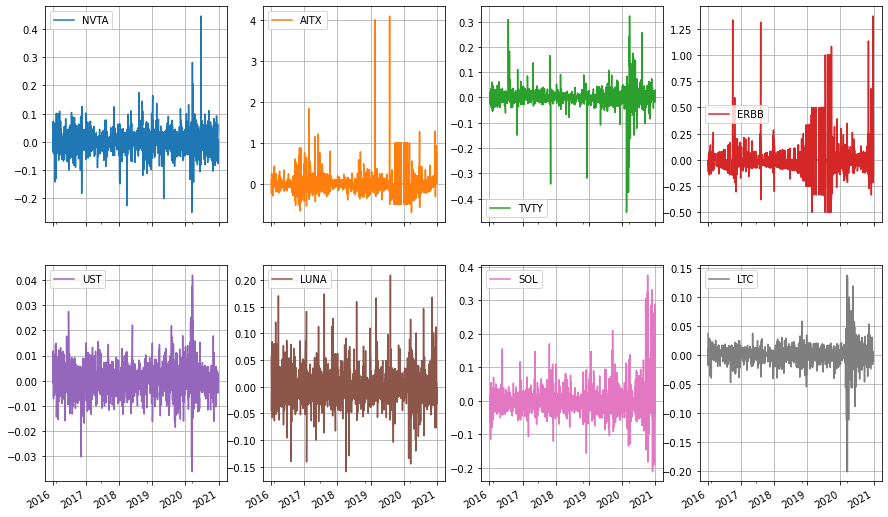

In [ ]:
#Plot all ticker data i.e. my returns to see distribution
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
#Print the plot
plt.show()

In [ ]:
# Calculate the cumulative daily returns using pandas cumprod function
df_cum_daily_returns = (1 + return_data).cumprod() - 1
df_cum_daily_returns = df_cum_daily_returns.reset_index()
# Display the cumulative daily returns
df_cum_daily_returns

,index,NVTA,AITX,TVTY,ERBB,UST,LUNA,SOL,LTC
0,2016-01-05,0.021918,0.105263,0.007026,-0.0500,-0.000884,0.056604,-0.021978,0.036985
1,2016-01-06,-0.002740,0.105263,0.029664,-0.1000,0.010958,0.028302,-0.005495,0.026983
2,2016-01-07,-0.039726,-0.157895,0.016393,-0.1000,0.014670,-0.018868,-0.071429,0.008374
3,2016-01-08,0.030137,0.052632,-0.010148,-0.2000,0.021209,-0.056604,-0.065934,0.001395
4,2016-01-11,-0.006849,0.052632,-0.036690,-0.2500,0.013786,-0.037736,-0.093407,0.012561
...,...,...,...,...,...,...,...,...,...
1252,2020-12-23,5.984932,-1.000000,0.515222,-0.9936,0.361619,9.132076,0.065934,0.174696
1253,2020-12-24,5.447945,-1.000000,0.530055,-0.9950,0.365523,8.349057,0.065934,0.182238
1254,2020-12-28,5.226027,-1.000000,0.515222,-0.9960,0.367196,8.339623,0.373626,0.188875
1255,2020-12-29,5.019178,-1.000000,0.487119,-0.9949,0.366824,8.028302,0.343956,0.179221


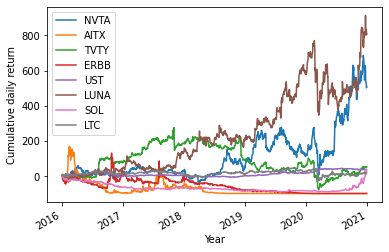

In [ ]:
#Plotting cumulative daily returns
dailyreturnplot=df_cum_daily_returns.copy()
dailyreturnplot=dailyreturnplot.set_index('index')
dailyreturnplot=dailyreturnplot*100
#Plot, Label and print the graph
dailyreturnplot.plot()
plt.xlabel('Year')
plt.ylabel('Cumulative daily return')
plt.show()

In [ ]:
#Last record of dataframe multiplied by 100 is giving us the percentage change of the stock prices for our entire period, as shown below
cum_return_entire_period = df_cum_daily_returns.iloc[:, 1:].tail(1)
cum_return_entire_period * 100

,NVTA,AITX,TVTY,ERBB,UST,LUNA,SOL,LTC
1256,505.479447,-99.999977,53.083528,-99.56,36.756748,809.434044,28.351646,16.685286


# Optimization Model

In [ ]:
# before you do anything...
# mount your drive!
# click folder on the left...
# import modules

# import modules
import pandas as pd
import numpy as np
from pylab import * 
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("bonmin") or os.path.isfile("bonmin")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
        !unzip -o -q bonmin-linux64
        # !apt-get install -y -qq mindtpy
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("bonmin") or os.path.isfile("bonmin"))

# This is how you should setup the SolverFactory command to use Bonmin
# SolverFactory('bonmin', executable='/content/bonmin')

from pyomo.environ import *


# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 9.6 MB 11.8 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 


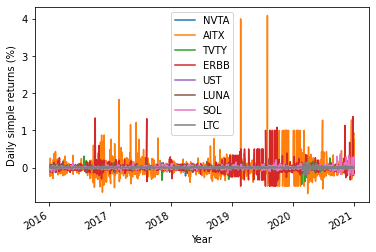

In [ ]:
#Visualize past returns of all tickers
return_data.plot()
plt.xlabel('Year')
plt.ylabel('Daily simple returns (%)')
plt.show()
#we get simple returns for each day for each ticker.

In [ ]:
# Print the first few rows of the data
return_data.head()

,NVTA,AITX,TVTY,ERBB,UST,LUNA,SOL,LTC
2016-01-05,0.021918,0.105263,0.007026,-0.050000,-0.000884,0.056604,-0.021978,0.036985
2016-01-06,-0.024129,0.000000,0.022481,-0.052632,0.011852,-0.026786,0.016854,-0.009645
2016-01-07,-0.037088,-0.238095,-0.012888,0.000000,0.003671,-0.045872,-0.066298,-0.018120
2016-01-08,0.072753,0.250000,-0.026114,-0.111111,0.006445,-0.038462,0.005917,-0.006921
2016-01-11,-0.035904,0.000000,-0.026814,-0.062500,-0.007269,0.020000,-0.029412,0.011150


In [ ]:
# covariance matrix
Covariance_matrix = return_data.cov()
Covariance_matrix
# Display the covariance matrix
Covariance_matrix.style.background_gradient(cmap='coolwarm')

,NVTA,AITX,TVTY,ERBB,UST,LUNA,SOL,LTC
NVTA,0.002135,0.000382,0.000582,0.000051,-0.000027,0.000275,0.000280,0.000288
AITX,0.000382,0.082759,0.000408,-0.000974,-0.000003,-0.000121,0.000564,-0.000226
TVTY,0.000582,0.000408,0.001756,0.000012,-0.000023,0.000211,0.000214,0.000320
ERBB,0.000051,-0.000974,0.000012,0.024070,-0.000055,0.000224,0.000081,-0.000125
UST,-0.000027,-0.000003,-0.000023,-0.000055,0.000043,-0.000023,-0.000021,-0.000009
LUNA,0.000275,-0.000121,0.000211,0.000224,-0.000023,0.001278,0.000190,0.000165
SOL,0.000280,0.000564,0.000214,0.000081,-0.000021,0.000190,0.002248,0.000119
LTC,0.000288,-0.000226,0.000320,-0.000125,-0.000009,0.000165,0.000119,0.000408


In [ ]:
# Copy the data into dataset df
df=return_data.copy()

In [ ]:
# creating covariance table on stock return dataframe to store covariance results
#covariace measures how two variables are different/measures direction of relation between 2 variables
df_cov = df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of every ticker, which become the coefficients of our objective function
df_return = df.mean()
# Printing the average return of the stocks
print('Average Return:')
print(df_return)

Covariance Matrix:
          NVTA      AITX      TVTY      ERBB       UST      LUNA       SOL  \
NVTA  0.002135  0.000382  0.000582  0.000051 -0.000027  0.000275  0.000280   
AITX  0.000382  0.082759  0.000408 -0.000974 -0.000003 -0.000121  0.000564   
TVTY  0.000582  0.000408  0.001756  0.000012 -0.000023  0.000211  0.000214   
ERBB  0.000051 -0.000974  0.000012  0.024070 -0.000055  0.000224  0.000081   
UST  -0.000027 -0.000003 -0.000023 -0.000055  0.000043 -0.000023 -0.000021   
LUNA  0.000275 -0.000121  0.000211  0.000224 -0.000023  0.001278  0.000190   
SOL   0.000280  0.000564  0.000214  0.000081 -0.000021  0.000190  0.002248   
LTC   0.000288 -0.000226  0.000320 -0.000125 -0.000009  0.000165  0.000119   

           LTC  
NVTA  0.000288  
AITX -0.000226  
TVTY  0.000320  
ERBB -0.000125  
UST  -0.000009  
LUNA  0.000165  
SOL   0.000119  
LTC   0.000408  


Average Return:
NVTA    0.002494
AITX    0.015903
TVTY    0.001282
ERBB    0.005454
UST     0.000271
LUNA    0.002391
SOL  

In [ ]:
df_cov
#covariance matrix output

,NVTA,AITX,TVTY,ERBB,UST,LUNA,SOL,LTC
NVTA,0.002135,0.000382,0.000582,0.000051,-0.000027,0.000275,0.000280,0.000288
AITX,0.000382,0.082759,0.000408,-0.000974,-0.000003,-0.000121,0.000564,-0.000226
TVTY,0.000582,0.000408,0.001756,0.000012,-0.000023,0.000211,0.000214,0.000320
ERBB,0.000051,-0.000974,0.000012,0.024070,-0.000055,0.000224,0.000081,-0.000125
UST,-0.000027,-0.000003,-0.000023,-0.000055,0.000043,-0.000023,-0.000021,-0.000009
LUNA,0.000275,-0.000121,0.000211,0.000224,-0.000023,0.001278,0.000190,0.000165
SOL,0.000280,0.000564,0.000214,0.000081,-0.000021,0.000190,0.002248,0.000119
LTC,0.000288,-0.000226,0.000320,-0.000125,-0.000009,0.000165,0.000119,0.000408


## Portfolio Optimization modeling

In [ ]:
#define for portfolio optimization
from pyomo.environ import *
m = ConcreteModel()

# defining variables for all our tickers i.e. our stocks and cryptocurrencies
m.NVTA = Var(within=NonNegativeReals, bounds=(0,1))
m.AITX = Var(within=NonNegativeReals, bounds=(0,1))
m.TVTY = Var(within=NonNegativeReals, bounds=(0,1))
m.ERBB = Var(within=NonNegativeReals, bounds=(0,1))
m.UST = Var(within=NonNegativeReals, bounds=(0,1))
m.LUNA = Var(within=NonNegativeReals, bounds=(0,1))
m.SOL = Var(within=NonNegativeReals, bounds=(0,1))
m.LTC = Var(within=NonNegativeReals, bounds=(0,1))

In [ ]:
#GOAL : Portfolio allocation strategy to distribute amount across stocks and cryptocurencies to get maximum value

# declare objective fuction to maximize returns
m.objective = Objective(expr =               
                        m.NVTA*df_return[0] + 
                        m.AITX*df_return[1] + 
                        m.TVTY*df_return[2] +
                        m.ERBB*df_return[3] + 
                        m.UST* df_return[4]+
                        m.LUNA*df_return[5] + 
                        m.SOL*df_return[6] + 
                        m.LTC*df_return[7], 
                        sense=maximize)


# declare constraints
# 1. Sum of all proportions = 1 i.e. we invest all of our money
m.sum_proportions = Constraint(expr = m.NVTA+m.AITX+m.TVTY+m.ERBB+m.UST+m.LUNA+m.SOL+m.LTC == 1)

# 2. Set lower limit for risk (to maximize profit)
m.total_risk = Constraint(expr = m.NVTA+m.AITX+m.TVTY+m.ERBB+m.UST+m.LUNA+m.SOL+m.LTC >= 0.0)

In [ ]:
# creating calculations table for calculate the risk
#risk = Prop(A)Prop(B)Cov(A,B).
def calc_risk(m):
  variables = m.NVTA,m.AITX,m.TVTY,m.ERBB,m.UST,m.LUNA,m.SOL,m.LTC
  tickers = ['NVTA','AITX','TVTY','ERBB','UST','LUNA','SOL','LTC']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

#we tried different risk levels and arrived at 0.15 as our ideal max_risk level
max_risk = 0.15

# Sequence of risk levels
risk_limits = np.arange(0.001, max_risk, 0.0001) # take tiny steps
risk_limits

array([0.001 , 0.0011, 0.0012, ..., 0.1497, 0.1498, 0.1499])

In [ ]:
np.count_nonzero(risk_limits)
#number of risk limits

1490

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem

param_analysis = {} # DICTIONARY :key=risk, value =stock allocations 
returns = {} # DICTIONARY : key=risk, value = return

#We solve optimizaiton problem for every risk limit
for r in risk_limits:
  # Remove previously defined total risk constraint to avoid error messages
  m.del_component(m.total_risk)
  #r here is risk limit from for loop
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('bonmin', executable='/content/bonmin').solve(m)

  # If solution is not feasible, ignore this run hence 'continue'
  #Filter out infeasible solutions
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.NVTA(),m.AITX(),m.TVTY(),m.ERBB(),m.UST(),m.LUNA(),m.SOL(),m.LTC()]
  # store our returns
  returns[r] =  m.NVTA()*df_return[0] + m.AITX()*df_return[1] + m.TVTY()*df_return[2] +m.ERBB()*df_return[3] + m.UST()* df_return[4]+m.LUNA()*df_return[5] + m.SOL()*df_return[6] + m.LTC()*df_return[7]


Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.03560209274291992
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 8
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------

## 2. Visualisation of optimal stock allocation 

<Figure size 144000x160000 with 0 Axes>

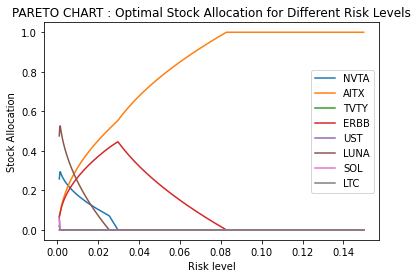

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
# pareto chart : shows how much reward for risk
from matplotlib.pyplot import figure
figure(figsize=(1800, 2000), dpi=80)
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['NVTA','AITX','TVTY','ERBB','UST','LUNA','SOL','LTC']
param_analysis.plot()
# Title and label of the graph
plt.title('PARETO CHART : Optimal Stock Allocation for Different Risk Levels')
plt.xlabel('Risk level')
plt.ylabel('Stock Allocation')
plt.show()
#we see that 

CLOSER LOOK :

![image.png]()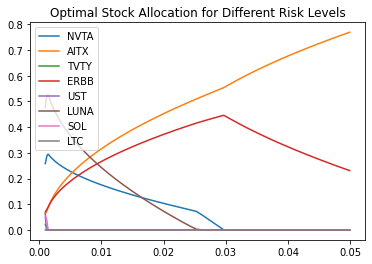

In [ ]:
# subset
# Risk
risk = list(returns.keys()) #Dictionary values converetd to list
print(risk)
# Reward
reward = list(returns.values())#Dictionary values converetd to list
print(reward)

[0.001, 0.0011, 0.0012000000000000001, 0.0013000000000000002, 0.0014000000000000002, 0.0015000000000000002, 0.0016000000000000003, 0.0017000000000000003, 0.0018000000000000004, 0.0019000000000000004, 0.0020000000000000005, 0.0021000000000000003, 0.0022000000000000006, 0.002300000000000001, 0.0024000000000000007, 0.0025000000000000005, 0.0026000000000000007, 0.002700000000000001, 0.002800000000000001, 0.0029000000000000007, 0.003000000000000001, 0.003100000000000001, 0.003200000000000001, 0.003300000000000001, 0.003400000000000001, 0.0035000000000000014, 0.003600000000000001, 0.003700000000000001, 0.0038000000000000013, 0.0039000000000000016, 0.004000000000000002, 0.004100000000000001, 0.0042000000000000015, 0.004300000000000002, 0.004400000000000001, 0.004500000000000001, 0.004600000000000002, 0.004700000000000002, 0.004800000000000002, 0.004900000000000002, 0.005000000000000002, 0.005100000000000002, 0.005200000000000002, 0.005300000000000002, 0.005400000000000002, 0.00550000000000000

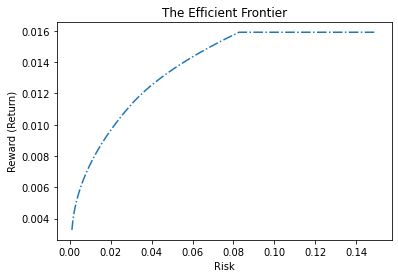

In [ ]:
# plot! pylab makes it easy
from pylab import *
# The risk verses reward graph is plotted
plot(risk, reward, '-.')
#Title and label of the plot
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

# Simulation Model

Based on the parato chart that we see above, we see that there are 4 assets that can be picked for a risk level of 0.005 or 0.0075 where the rest of the 4 assets go to 0 returns with increasing risks. 

The 4 assests that do not converge to a 0 returns at a risk of until 0.025 are the following 

["NVTA","AITX","LUNA","ERBB"] are the aseets that are under consideration for the monte carlo simulation

the objective of this simulation is to find the probability with which our portfolio with the chosen stock proportion will lose money

In [ ]:
# retrieve covariance matrix from the previous steps
df_cov

,NVTA,AITX,TVTY,ERBB,UST,LUNA,SOL,LTC
NVTA,0.002135,0.000382,0.000582,0.000051,-0.000027,0.000275,0.000280,0.000288
AITX,0.000382,0.082759,0.000408,-0.000974,-0.000003,-0.000121,0.000564,-0.000226
TVTY,0.000582,0.000408,0.001756,0.000012,-0.000023,0.000211,0.000214,0.000320
ERBB,0.000051,-0.000974,0.000012,0.024070,-0.000055,0.000224,0.000081,-0.000125
UST,-0.000027,-0.000003,-0.000023,-0.000055,0.000043,-0.000023,-0.000021,-0.000009
LUNA,0.000275,-0.000121,0.000211,0.000224,-0.000023,0.001278,0.000190,0.000165
SOL,0.000280,0.000564,0.000214,0.000081,-0.000021,0.000190,0.002248,0.000119
LTC,0.000288,-0.000226,0.000320,-0.000125,-0.000009,0.000165,0.000119,0.000408


In [ ]:
# for the following list of ["NVTA","AITX","LUNA","ERBB"], we must subset the co-variance matrix from the main covariance matrix
df_cov_ss=df_cov.loc[["NVTA","AITX","LUNA","ERBB"],["NVTA","AITX","LUNA","ERBB"]]

In [ ]:
# Display the first few records of the df_cov_ss table
df_cov_ss.head()

,NVTA,AITX,LUNA,ERBB
NVTA,0.002135,0.000382,0.000275,0.000051
AITX,0.000382,0.082759,-0.000121,-0.000974
LUNA,0.000275,-0.000121,0.001278,0.000224
ERBB,0.000051,-0.000974,0.000224,0.024070


In [ ]:
import numpy as np

In [ ]:
# convert the array to a list
risks_1=(risk_limits).tolist()
#print the list to observe the values of risk_levels(to see the exact value of risk levels that was considered in the previous step)
risks_1

[0.001,
 0.0011,
 0.0012000000000000001,
 0.0013000000000000002,
 0.0014000000000000002,
 0.0015000000000000002,
 0.0016000000000000003,
 0.0017000000000000003,
 0.0018000000000000004,
 0.0019000000000000004,
 0.0020000000000000005,
 0.0021000000000000003,
 0.0022000000000000006,
 0.002300000000000001,
 0.0024000000000000007,
 0.0025000000000000005,
 0.0026000000000000007,
 0.002700000000000001,
 0.002800000000000001,
 0.0029000000000000007,
 0.003000000000000001,
 0.003100000000000001,
 0.003200000000000001,
 0.003300000000000001,
 0.003400000000000001,
 0.0035000000000000014,
 0.003600000000000001,
 0.003700000000000001,
 0.0038000000000000013,
 0.0039000000000000016,
 0.004000000000000002,
 0.004100000000000001,
 0.0042000000000000015,
 0.004300000000000002,
 0.004400000000000001,
 0.004500000000000001,
 0.004600000000000002,
 0.004700000000000002,
 0.004800000000000002,
 0.004900000000000002,
 0.005000000000000002,
 0.005100000000000002,
 0.005200000000000002,
 0.005300000000000002

In [ ]:
#0.007500000000000003 is closest risk values we had identified from the pareto chart
print(risks_1.index(0.007500000000000003))
print(risks_1.index(0.005500000000000002))
print(risks_1.index(0.01950000000000001))

65
45
185


In [ ]:
#retrieve the main returns value from the first part of the optimisation analysis
df_return

NVTA    0.002494
AITX    0.015903
TVTY    0.001282
ERBB    0.005454
UST     0.000271
LUNA    0.002391
SOL     0.001263
LTC     0.000332
dtype: float64

In [ ]:
# to see if this risk value give us exactl 4 stocks with non-zero proportions
param_analysis.loc[0.007500000000000003]

NVTA    1.991376e-01
AITX    2.702616e-01
TVTY    1.464209e-10
ERBB    2.313058e-01
UST     0.000000e+00
LUNA    2.992951e-01
SOL     1.183498e-10
LTC     0.000000e+00
Name: 0.007500000000000003, dtype: float64

In [ ]:
# subset the return values from the main dataframe
df_return.iloc[[0,1,5,3]]

NVTA    0.002494
AITX    0.015903
LUNA    0.002391
ERBB    0.005454
dtype: float64

In [ ]:
## retreive the returns for the NVTA, AITX, ERBB and LUNA for a particular date and store it in a subset
df_return_ss=df_return.iloc[[0,1,5,3]]

## Simulating % loss

The following snippets of code were generated to check for the loss % for different values of risk levels. 

---



In [ ]:
# to retrieve the proportion of NVTA, AITX, ERBB and LUNA, we use the indices 0,1,3 and  and store it in n,a,e,l varaible
#let us fix the risk level to be [0.007500000000000003] since it shows the presence of 4 stocks and the rest of the 4 tends to 0 at this level
n=param_analysis.loc[0.007500000000000003][0]
a=param_analysis.loc[0.007500000000000003][1]
e=param_analysis.loc[0.007500000000000003][3]
l=param_analysis.loc[0.007500000000000003][5]

#n,a,e,l stores the proportion of assets for the chosen risk value

In [ ]:
# run the simulation
simulations=100000
sum_of_returns=list()
#the loss_val is a counter that will increment everytime sum of return*proprotion for 4 chosen stocks is less than 1
# for the simulation, we need to get the value of return for each of the chosen asset 
# this is donw using the np multivariate function that takes into account the mean of returns and covariance for the assets to compute the values.
# the result of this function is a list of 4 asset value or return values 


loss_val=0 
for i in range(simulations):
  asset_list=np.random.multivariate_normal(df_return_ss,df_cov_ss)



# We are computing the investment value by taking the product of the returns and proportion of assets
# if this total investment value is less than 0, this implies we will lose money 

  value_asset=(asset_list[0]*n)+(asset_list[1]*a)+(asset_list[2]*l)+(asset_list[3]*e)
  sum_of_returns.append(value_asset)
  if(value_asset<0):
    loss_val+=1
  else:
    continue

loss_p=round((loss_val/simulations)*100,2)


print("The probability percentage of losing money in this portfolio for a risk of 0.007500000000000003 is:", loss_p,"%")

The probability percentage of losing money in this portfolio for a risk of 0.007500000000000003 is: 46.9 %


## Density Plot Graph

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


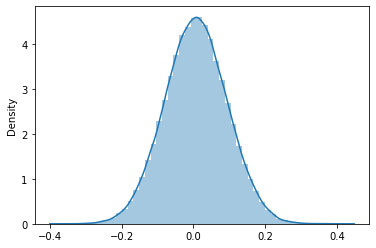

In [ ]:
# Displaying the density plot graph
sns.distplot(sum_of_returns)

# Analysis

Analyze S&P 500 and Dow Jones Indices stock allocations
Using the One risk level from the efficient frontier plot above, Create a table that shows the price of your stocks on the first day of each month from Jan 1, 2021 (when you would have done your allocation), Feb 1, 2021 ... through October 1, 2021 (when we imagine you sold your stocks) that comes from that risk level.

**Looking at the efficient frontier from above, we do not have any gain in returns after a risk = 0.0006.** We are able to arrive at this conclusion as we set our max_risk = 0.0015, hence we set the same for analyzing the stocks from the S&P and Dow Jones indices as well.

**S&P 500**



In [ ]:
#Scrapping monthly Stock data from Yahoo Finance from Jan 1 2021 to Oct 1, 2021

# Assign the ticker list that we want to scrap
#Stocks selected are 'NVTA','AITX','LUNA','ERBB'
tickers_list = ['NVTA','AITX','LUNA','ERBB']
# pull historical price data for each stocks to match with our news score later
sp_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='01/01/2022',interval='1mo') for ticker in tickers_list}

In [ ]:
#see results
sp_prices

{'AITX':                open     high      low    close  adjclose      volume ticker
 2021-01-01  0.03480  0.21000  0.02100  0.10900   0.10900  4678656175   AITX
 2021-02-01  0.12995  0.28990  0.08100  0.13800   0.13800  2785156638   AITX
 2021-03-01  0.15500  0.16000  0.08880  0.09250   0.09250  1468578236   AITX
 2021-04-01  0.09200  0.11990  0.05000  0.10000   0.10000  1429210011   AITX
 2021-05-01  0.11200  0.11290  0.06050  0.06320   0.06320   719367114   AITX
 2021-06-01  0.06320  0.08926  0.05000  0.05905   0.05905  1064570136   AITX
 2021-07-01  0.05900  0.05980  0.03800  0.04295   0.04295   717946999   AITX
 2021-08-01  0.04500  0.05220  0.02650  0.04285   0.04285   765256919   AITX
 2021-09-01  0.04510  0.04760  0.03087  0.03120   0.03120   418386270   AITX
 2021-10-01  0.03190  0.05200  0.02510  0.03687   0.03687  1116480402   AITX
 2021-11-01  0.03750  0.03850  0.02600  0.02660   0.02660   722647030   AITX
 2021-12-01  0.02700  0.02890  0.01450  0.01511   0.01511   79824645

In [ ]:
#extracting just the data we need
sp_prep = pd.DataFrame(sp_prices['NVTA']['adjclose']).rename(columns = {"adjclose":"NVTA"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  sp_prep[i] = pd.DataFrame(sp_prices[i]['adjclose'])
# Display the results
sp_prep

,NVTA,AITX,LUNA,ERBB
2021-01-01,49.520000,0.10900,10.63,0.01200
2021-02-01,40.130001,0.13800,11.74,0.01170
2021-03-01,38.209999,0.09250,10.53,0.00950
2021-04-01,34.900002,0.10000,11.34,0.00830
2021-05-01,28.780001,0.06320,10.15,0.00625
2021-06-01,33.730000,0.05905,10.83,0.00560
2021-07-01,27.990000,0.04295,12.33,0.00390
2021-08-01,29.629999,0.04285,10.77,0.00540
2021-09-01,28.430000,0.03120,9.50,0.00420
2021-10-01,26.500000,0.03687,9.74,0.00360


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_sp = pd.DataFrame()
for i in tickers_list:
  return_sp[i] = sp_prep[i].pct_change()
# drop the na records
return_sp.dropna(inplace=True)
return_sp

,NVTA,AITX,LUNA,ERBB
2021-02-01,-0.189620,0.266055,0.104421,-0.025000
2021-03-01,-0.047845,-0.329710,-0.103066,-0.188034
2021-04-01,-0.086626,0.081081,0.076923,-0.126316
2021-05-01,-0.175358,-0.368000,-0.104938,-0.246988
2021-06-01,0.171994,-0.065664,0.066995,-0.104000
2021-07-01,-0.170175,-0.272650,0.138504,-0.303571
2021-08-01,0.058592,-0.002328,-0.126521,0.384615
2021-09-01,-0.040499,-0.271879,-0.117920,-0.222222
2021-10-01,-0.067886,0.181731,0.025263,-0.142857
2021-11-01,-0.358491,-0.278546,-0.140657,-0.208333


In [ ]:
#drop index to avoid issues while running model
return_sp.reset_index(drop=True, inplace=True)
return_sp

,NVTA,AITX,LUNA,ERBB
0,-0.189620,0.266055,0.104421,-0.025000
1,-0.047845,-0.329710,-0.103066,-0.188034
2,-0.086626,0.081081,0.076923,-0.126316
3,-0.175358,-0.368000,-0.104938,-0.246988
4,0.171994,-0.065664,0.066995,-0.104000
5,-0.170175,-0.272650,0.138504,-0.303571
6,0.058592,-0.002328,-0.126521,0.384615
7,-0.040499,-0.271879,-0.117920,-0.222222
8,-0.067886,0.181731,0.025263,-0.142857
9,-0.358491,-0.278546,-0.140657,-0.208333


In [ ]:
# creating covariance table on stock return dataframe
sp_cov = return_sp.cov()
print('Covariance Matrix:')
print(sp_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
sp_return = return_sp.mean()
print('Average Return:')
print(sp_return)

Covariance Matrix:
          NVTA      AITX      LUNA      ERBB
NVTA  0.019128  0.006362  0.001423  0.011059
AITX  0.006362  0.056893  0.011356  0.019317
LUNA  0.001423  0.011356  0.010982 -0.003432
ERBB  0.011059  0.019317 -0.003432  0.033717


Average Return:
NVTA   -0.091607
AITX   -0.135624
LUNA   -0.015694
ERBB   -0.118683
dtype: float64


In [ ]:
# The S&P 500 values were extracted through the ticketer's list
tickers_list_SP = ['^GSPC']
# pull historical price data for S&P 500

dow_prices_SP = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='01/01/2022',interval='1mo') for ticker in tickers_list_SP}
prep_data_SP = pd.DataFrame(dow_prices_SP['^GSPC']['adjclose']).rename(columns = {"adjclose":"^GSPC"})
prep_data_SP

,^GSPC
2021-01-01,3714.239990
2021-02-01,3811.149902
2021-03-01,3972.889893
2021-04-01,4181.169922
2021-05-01,4204.109863
2021-06-01,4297.500000
2021-07-01,4395.259766
2021-08-01,4522.680176
2021-09-01,4307.540039
2021-10-01,4605.379883


In [ ]:
tickers_list_DJI = ['^DJI']
# pull historical price data for DowJones
dow_prices_DJI = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='01/01/2022',interval='1mo') for ticker in tickers_list_DJI}
prep_data_DJI = pd.DataFrame(dow_prices_DJI['^DJI']['adjclose']).rename(columns = {"adjclose":"^DJI"})
prep_data_DJI

,^DJI
2021-01-01,29982.619141
2021-02-01,30932.369141
2021-03-01,32981.550781
2021-04-01,33874.851562
2021-05-01,34529.449219
2021-06-01,34502.511719
2021-07-01,34935.468750
2021-08-01,35360.730469
2021-09-01,33843.921875
2021-10-01,35819.558594


In [ ]:
#Scrapping monthly Stock data from Yahoo Finance from Jan 1 2021 to Jan 1 2022

# Assign the ticker list that we want to scrap
tickers_list = ['NVTA','AITX','LUNA','ERBB','^GSPC','^DJI']
# pull historical price data for each stocks to match with our news score later
sp_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='01/01/2022',interval='1mo') for ticker in tickers_list}

In [ ]:
sp_prep = pd.DataFrame(sp_prices['NVTA']['adjclose']).rename(columns = {"adjclose":"NVTA"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  sp_prep[i] = pd.DataFrame(sp_prices[i]['adjclose'])
#Display the results
sp_prep

,NVTA,AITX,LUNA,ERBB,^GSPC,^DJI
2021-01-01,49.520000,0.10900,10.63,0.01200,3714.239990,29982.619141
2021-02-01,40.130001,0.13800,11.74,0.01170,3811.149902,30932.369141
2021-03-01,38.209999,0.09250,10.53,0.00950,3972.889893,32981.550781
2021-04-01,34.900002,0.10000,11.34,0.00830,4181.169922,33874.851562
2021-05-01,28.780001,0.06320,10.15,0.00625,4204.109863,34529.449219
2021-06-01,33.730000,0.05905,10.83,0.00560,4297.500000,34502.511719
2021-07-01,27.990000,0.04295,12.33,0.00390,4395.259766,34935.468750
2021-08-01,29.629999,0.04285,10.77,0.00540,4522.680176,35360.730469
2021-09-01,28.430000,0.03120,9.50,0.00420,4307.540039,33843.921875
2021-10-01,26.500000,0.03687,9.74,0.00360,4605.379883,35819.558594


In [ ]:
#addd the value returns for the chose proportion of assets .
# a,n,e,l are the proporiton of assets for the chosen portfolio
sp_prep["NVTA_n"]=sp_prep["NVTA"]*n
sp_prep["AITX_a"]=sp_prep["AITX"]*a
sp_prep["LUNA_l"]=sp_prep["LUNA"]*l
sp_prep["ERBB_e"]=sp_prep["ERBB"]*e

In [ ]:
sp_prep.drop(["NVTA","AITX","LUNA","ERBB"],axis=1,inplace=True)

In [ ]:
sp_prep.rename(columns = {"NVTA_n":"NVTA","AITX_a":"AITX","LUNA_l":"LUNA","ERBB_e":"ERBB"},inplace=True)

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_sp = pd.DataFrame()
for i in tickers_list:
  return_sp[i] = sp_prep[i].pct_change()
# drop the na records
return_sp.dropna(inplace=True)
return_sp

,NVTA,AITX,LUNA,ERBB,^GSPC,^DJI
2021-02-01,-0.189620,0.266055,0.104421,-0.025000,0.026091,0.031677
2021-03-01,-0.047845,-0.329710,-0.103066,-0.188034,0.042439,0.066247
2021-04-01,-0.086626,0.081081,0.076923,-0.126316,0.052425,0.027085
2021-05-01,-0.175358,-0.368000,-0.104938,-0.246988,0.005486,0.019324
2021-06-01,0.171994,-0.065664,0.066995,-0.104000,0.022214,-0.000780
2021-07-01,-0.170175,-0.272650,0.138504,-0.303571,0.022748,0.012549
2021-08-01,0.058592,-0.002328,-0.126521,0.384615,0.028990,0.012173
2021-09-01,-0.040499,-0.271879,-0.117920,-0.222222,-0.047569,-0.042895
2021-10-01,-0.067886,0.181731,0.025263,-0.142857,0.069144,0.058375
2021-11-01,-0.358491,-0.278546,-0.140657,-0.208333,-0.008334,-0.037294


In [ ]:
#drop index to avoid issues while running model
return_sp.reset_index(drop=True, inplace=True)
return_sp

,NVTA,AITX,LUNA,ERBB,^GSPC,^DJI
0,-0.189620,0.266055,0.104421,-0.025000,0.026091,0.031677
1,-0.047845,-0.329710,-0.103066,-0.188034,0.042439,0.066247
2,-0.086626,0.081081,0.076923,-0.126316,0.052425,0.027085
3,-0.175358,-0.368000,-0.104938,-0.246988,0.005486,0.019324
4,0.171994,-0.065664,0.066995,-0.104000,0.022214,-0.000780
5,-0.170175,-0.272650,0.138504,-0.303571,0.022748,0.012549
6,0.058592,-0.002328,-0.126521,0.384615,0.028990,0.012173
7,-0.040499,-0.271879,-0.117920,-0.222222,-0.047569,-0.042895
8,-0.067886,0.181731,0.025263,-0.142857,0.069144,0.058375
9,-0.358491,-0.278546,-0.140657,-0.208333,-0.008334,-0.037294


In [ ]:
# create the performance report for the returns value
assets_returns_1=return_sp[["NVTA","AITX","ERBB","LUNA"]].sum().sum()
sp_ret=return_sp["^GSPC"].sum()
dj_ret=return_sp["^DJI"].sum()
performance_report = pd.DataFrame({'Returns':[sp_ret,dj_ret,assets_returns_1]}, index=["S&P 500","Dow Jones","Portfolio Chosen" ])
performance_report

,Returns
S&P 500,0.257248
Dow Jones,0.200241
Portfolio Chosen,-3.977691


The chosen portfolio was then compared with the % returns from S&P 500 and Dow Jones. The S&P 500 shows a return of 0.257 and Dow Jones of 0.20. However we see that portfolio we chose with a proportion of
0.199 NVTA, 0.270 AITX, 0.299 LUNA and 0.233 of ERBB, has a comparitvely higher negative returns for the year 2021.Thus implying that an investment in this chosen portfolio could lead to a loss of money compared to investing in S&P 500 or Dow Jones.

In [ ]:
# creating covariance table on stock return dataframe
sp_cov = return_sp.cov()
# Printing the covariance matrix
print('Covariance Matrix:')
print(sp_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
sp_return = return_sp.mean()
# Printing the average return
print('Average Return:')
print(sp_return)

Covariance Matrix:
           NVTA      AITX      LUNA      ERBB     ^GSPC      ^DJI
NVTA   0.019128  0.006362  0.001423  0.011059  0.000851  0.000755
AITX   0.006362  0.056893  0.011356  0.019317  0.003132  0.001486
LUNA   0.001423  0.011356  0.010982 -0.003432  0.001571  0.001205
ERBB   0.011059  0.019317 -0.003432  0.033717  0.001293  0.000563
^GSPC  0.000851  0.003132  0.001571  0.001293  0.001011  0.000984
^DJI   0.000755  0.001486  0.001205  0.000563  0.000984  0.001269


Average Return:
NVTA    -0.091607
AITX    -0.135624
LUNA    -0.015694
ERBB    -0.118683
^GSPC    0.023386
^DJI     0.018204
dtype: float64


Optimization model with atleast 2 stocks receiving atleast 10% of budget each

Objective Function:

Max(Z) = NVTA * A1 + AITX* A2 + TVTY * A3 + ERBB * A4 + UST * A5 + LUNA * A6 + SOL * A7 + LTC * A8

Constraints:

Sum of all proportions = 1

NVTA+AITX+TVTY+ERBB+UST+LUNA+SOL+LTC = 1

At least 2 stocks should have more than 10% of the budget

A1+A2+A3+A4+A5+A6+A7+A8>=2

Each stock having atleast 10% if it is present

NVTA >= 0.1*A1

AITX >= 0.1*A2

TVTY >= 0.1*A3

ERBB >= 0.1*A4

UST >= 0.1*A5

LUNA >= 0.1*A6

SOL >= 0.1*A7

LTC>= 0.1*A8

In [ ]:
# Optimization model with atleast 2 stocks receiving atleast 10% of budget each
from pyomo.environ import *
budget = 1

# Defining the model
m = ConcreteModel()

# defining the different stocks as variables
m.NVTA = Var(within=NonNegativeReals, bounds=(0,1))
m.AITX = Var(within=NonNegativeReals, bounds=(0,1))
m.TVTY = Var(within=NonNegativeReals, bounds=(0,1))
m.ERBB = Var(within=NonNegativeReals, bounds=(0,1))
m.UST = Var(within=NonNegativeReals, bounds=(0,1))
m.LUNA = Var(within=NonNegativeReals, bounds=(0,1))
m.SOL = Var(within=NonNegativeReals, bounds=(0,1))
m.LTC = Var(within=NonNegativeReals, bounds=(0,1))

# Defining the binary variables for every stock. 
# If the value is 0, then the stock doesnot receive  atleast 10% of budget
# If the value is 1, then the stock receives  atleast 10% of budget
m.A1 = Var(domain=Binary) # Binary Variable for NVTA
m.A2 = Var(domain=Binary) # Binary Variable for AITX
m.A3 = Var(domain=Binary) # Binary Variable for TVTY
m.A4 = Var(domain=Binary) # Binary Variable for ERBB
m.A5 = Var(domain=Binary) # Binary Variable for UST
m.A6 = Var(domain=Binary) # Binary Variable for LUNA
m.A7 = Var(domain=Binary) # Binary Variable for SOL
m.A8 = Var(domain=Binary) # Binary Variable for LTC

In [ ]:
# Objective Function Max(Z) = NVTA * A1 + AITX* A2 + TVTY * A3 + ERBB * A4 + UST * A5 + LUNA * A6 + SOL * A7 + LTC * A8
m.objective = Objective(expr =               
                        m.NVTA*df_return[0] + 
                        m.AITX*df_return[1] + 
                        m.TVTY*df_return[2] +
                        m.ERBB*df_return[3] + 
                        m.UST* df_return[4]+
                        m.LUNA*df_return[5] + 
                        m.SOL*df_return[6] + 
                        m.LTC*df_return[7], 
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.NVTA+m.AITX+m.TVTY+m.ERBB+m.UST+m.LUNA+m.SOL+m.LTC == 1)


# 2. At least 2 stocks should have more than 10% of the budget
m.Constraint1 = Constraint(expr = m.A1+m.A2+m.A3+m.A4+m.A5+m.A6+m.A7+m.A8>=2)

#3 Since atleast 2 stocks should have alteast 10 % budget, we add the constraint to every stock 
# NVTA >= 0.1*A1
m.Constraint2 = Constraint(expr =m.NVTA>=0.1*m.A1)
# AITX >= 0.1*A2
m.Constraint3 = Constraint(expr =m.AITX>=0.1*m.A2)
# TVTY >= 0.1*A3
m.Constraint4 = Constraint(expr =m.TVTY>=0.1*m.A3)
# ERBB >= 0.1*A4
m.Constraint5 = Constraint(expr =m.ERBB>=0.1*m.A4)
# UST >= 0.1*A5
m.Constraint6 = Constraint(expr =m.UST>=0.1*m.A5)
# LUNA >= 0.1*A6
m.Constraint7 = Constraint(expr =m.LUNA>=0.1*m.A6)
# SOL >= 0.1*A7
m.Constraint8 = Constraint(expr =m.SOL>=0.1*m.A7)
# LTC>= 0.1*A8
m.Constraint9 = Constraint(expr =m.LTC>=0.1*m.A8)

# 3. Set maximum risk: WE ARE INCLUDING THIS CONSTRAINT NOW FOR TECHNICAL REASONS (see below), YOU CAN (and should!) IGNORE IT FOR NOW!
m.total_risk = Constraint(expr = m.NVTA+m.AITX+m.TVTY+m.ERBB+m.UST+m.LUNA+m.SOL+m.LTC >= 0.0)


In [ ]:
# creating calculations table for calculate the risk
# 3. Calculate risk
def calc_risk(m):
  variables = m.NVTA,m.AITX,m.TVTY,m.ERBB,m.UST,m.LUNA,m.SOL,m.LTC
  tickers = ['NVTA','AITX','TVTY','ERBB','UST','LUNA','SOL','LTC']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 3. Max risk should be less than 0.01
max_risk = 0.15
# Sequence of risk levels
risk_limits = np.arange(0.001, max_risk, 0.0001) # take tiny steps
risk_limits

array([0.001 , 0.0011, 0.0012, ..., 0.1497, 0.1498, 0.1499])

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('bonmin', executable='/content/bonmin').solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.NVTA(),m.AITX(),m.TVTY(),m.ERBB(),m.UST(),m.LUNA(),m.SOL(),m.LTC()]
  # store our returns
  returns[r] =  m.NVTA()*df_return[0] + m.AITX()*df_return[1] + m.TVTY()*df_return[2] +m.ERBB()*df_return[3] + m.UST()* df_return[4]+m.LUNA()*df_return[5] + m.SOL()*df_return[6] + m.LTC()*df_return[7]

Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.056221961975097656
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 16
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# --------------------------------------------

In [ ]:
# Print the results of the model
m.pprint()

16 Var Declarations
    A1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    A2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   1.0 :     1 : False : False : Binary
    A3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    A4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   1.0 :     1 : False : False : Binary
    A5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    A6 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    A7 : Size=1, Index=None
        Key  : Lower : Value : Upper : F

In [ ]:
# Display the profit
print("Returns = ", m.objective())
# Display the proportion of the stock if it is activated or not. 
# If activation = 0, then the stock is not activated
# If activation  = 1, then the stock is activated

# Proportion and activation of NVTA
print("Proportion of Stock NVTA = ", m.NVTA(), ", activation = ",m.A1())
# Proportion and activation of AITX
print("Proportion of Stock AITX = ", m.AITX(), ", activation = ",m.A2())
# Proportion and activation of TVTY
print("Proportion of Stock TVTY = ", m.TVTY(), ", activation = ",m.A3())
# Proportion and activation of ERBB
print("Proportion of Stock ERBB = ", m.ERBB(), ", activation = ",m.A4())
# Proportion and activation of UST
print("Proportion of Stock UST = ", m.UST(), ", activation = ",m.A5())
# Proportion and activation of LUNA
print("Proportion of Stock LUNA = ", m.LUNA(), ", activation = ",m.A6())
# Proportion and activation of SOL
print("Proportion of Stock SOL = ", m.SOL(), ", activation = ",m.A7())
# Proportion and activation of LTC
print("Proportion of Stock LTC = ", m.LTC(), ", activation = ",m.A8())

Returns =  0.014858008237277549
Proportion of Stock NVTA =  0.0 , activation =  0.0
Proportion of Stock AITX =  0.9000000607733359 , activation =  1.0
Proportion of Stock TVTY =  0.0 , activation =  0.0
Proportion of Stock ERBB =  0.09999999095704329 , activation =  1.0
Proportion of Stock UST =  0.0 , activation =  0.0
Proportion of Stock LUNA =  0.0 , activation =  0.0
Proportion of Stock SOL =  0.0 , activation =  0.0
Proportion of Stock LTC =  0.0 , activation =  0.0


<Figure size 144000x160000 with 0 Axes>

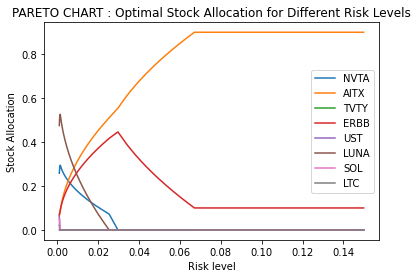

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
from matplotlib.pyplot import figure
# Size of the graph
figure(figsize=(1800, 2000), dpi=80)
# Plotting the graph
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['NVTA','AITX','TVTY','ERBB','UST','LUNA','SOL','LTC']
param_analysis.plot()
# Title and label of the graph
plt.title('PARETO CHART : Optimal Stock Allocation for Different Risk Levels')
plt.xlabel('Risk level')
plt.ylabel('Stock Allocation')
# Displaying the graph
plt.show()

In [ ]:
# List of the risk and reward
# Risk
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
# Reward
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.001, 0.0011, 0.0012000000000000001, 0.0013000000000000002, 0.0014000000000000002, 0.0015000000000000002, 0.0016000000000000003, 0.0017000000000000003, 0.0018000000000000004, 0.0019000000000000004, 0.0020000000000000005, 0.0021000000000000003, 0.0022000000000000006, 0.002300000000000001, 0.0024000000000000007, 0.0025000000000000005, 0.0026000000000000007, 0.002700000000000001, 0.002800000000000001, 0.0029000000000000007, 0.003000000000000001, 0.003100000000000001, 0.003200000000000001, 0.003300000000000001, 0.003400000000000001, 0.0035000000000000014, 0.003600000000000001, 0.003700000000000001, 0.0038000000000000013, 0.0039000000000000016, 0.004000000000000002, 0.004100000000000001, 0.0042000000000000015, 0.004300000000000002, 0.004400000000000001, 0.004500000000000001, 0.004600000000000002, 0.004700000000000002, 0.004800000000000002, 0.004900000000000002, 0.005000000000000002, 0.005100000000000002, 0.005200000000000002, 0.005300000000000002, 0.005400000000000002, 0.00550000000000000

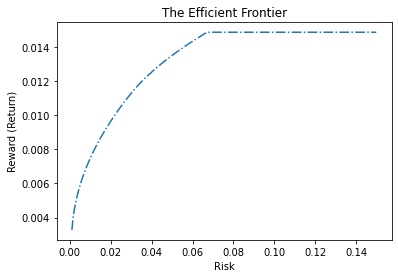

In [ ]:
# plot! pylab makes it easy
from pylab import *
# Plotting the graph
plot(risk, reward, '-.')
# Title and label of the graph
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
# Displaying the graph
plt.show()

# Conclusion 

* As a team, we had selected stocks with market cap of less than 2 billion dollars and a crypotocurrency market cap of 20 billion - 40 billion dollars. Out of the chosen cryptocurrencies, UST and LCT were chosen out of our required Market Cap bracket, since we had unsatisfactory data for the rest of the Cryptocurrencies fitting the Market cap. Crpotocurrencies like HEX,ADA,XRP had one-non null value, too many missing values and issues with extraction for the given time stamp repectively.Hence we had to drop them from our list. 


* In order to select a portfolio that distributes our investment amount optimally across stocks and cryptocurencies to get maximum returns, we perfromed the optimisation and computed the proprotions for each of the assets. At a risk value between 0.005 and above and below 0.026, we were able to identify 4 stocks and cryptocurrencies that gave us non-zero returns for different risk levels. These assets that gave use returns for risk levles between 0.005-0.026 were NVTA,AITX,ERBB and LUNA 

* A portfolio was selected by considering a risk level of 007500000000000003, less aggressive one. The chosen portfolio has a proportion of 0.199 of NVTA, 0.270 of AITX, 0.299 of LUNA and 0.233 of ERBB.  The probability with which our portfolio lost money was computed by running a Monte Carlo Model with 100000 simulations.This simulation showed that our portfolio had a probablity percentage 46.85% to lose money. 

* The chosen portfolio was then compared with the % returns from S&P 500 and Dow Jones and it was observed that this portfolio had a comparitvely higher negative returns for the year 2021.Thus implying that an investment in this chosen portfolio could lead to a loss of money compared to investing in S&P 500 or Dow Jones.

* We have then changed the optimization model to select at least 2 stocks with atleast 10% of the budget each. We have acheived this using Integer Programming. The results show that exact 2 stocks(AITX and ERBB) were selected with proportion of 0.9 and 0.1 respectively. The plateau in the pareto chart clearly have two stocks namely AITX, ERBB. Both these stocks shows a stagnant returns beyonf a risk level of 0.06. The value of returns for this portfolio diminishes with an increase in the risk level as shown in the efficient frontier graph





